# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [15]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df = df.head(30000)

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [16]:
rows = len(df)
print(rows) 
print(df.dtypes)


30000
Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [21]:
print("Columns and data types of this dataset:")
print("Each row contains all the information about dogs in NYC")
df.info()


Columns and data types of this dataset:
Each row contains all the information about dogs in NYC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [26]:

#1. What are the top 15 common names of dogs in this dataset? 
#2. How many percent of these dogs are vaccinated? 
#3. What group of dogs in NYC is bigger: guard dogs or trained  dogs? 

Animal Name
UNKNOWN     203
Max         202
Unknown     197
Bella       193
Charlie     172
Lola        146
Rocky       140
Lucy        128
Coco        114
Buddy       113
Lucky       106
Daisy        90
Lily         88
Princess     86
Bailey       83
Molly        81
Luna         81
Name: count, dtype: int64

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [32]:
import matplotlib as plot

<Axes: xlabel='Primary Breed'>

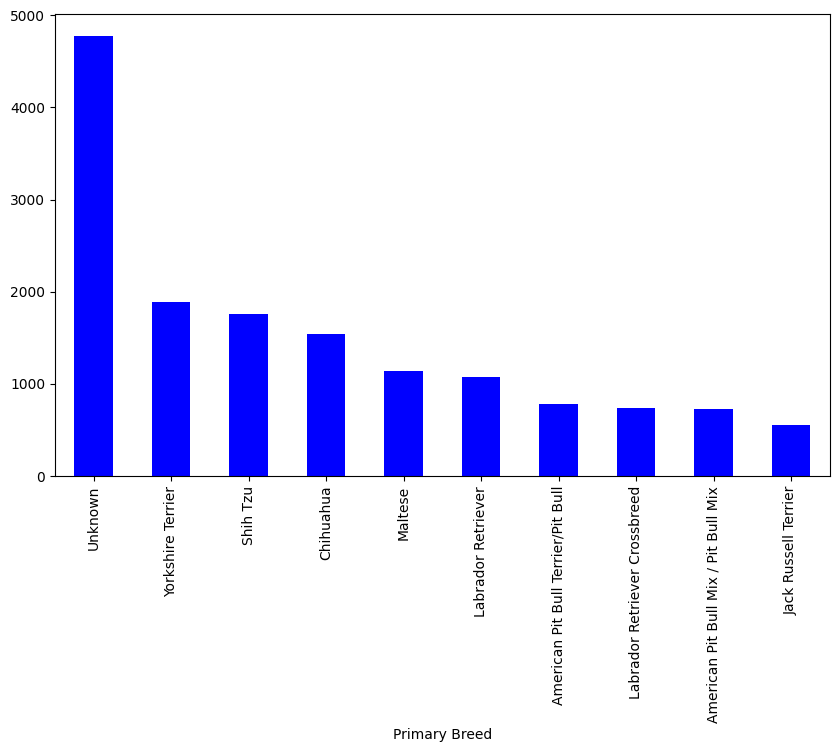

In [35]:
breeds = df['Primary Breed'].value_counts().head(10)

breeds.plot(kind='bar', figsize=(10, 6), color='blue')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [39]:
#df[df['Primary Breed'] != 'Unknown']
#breeds = df['Primary Breed'].value_counts().head(10)
#breeds.plot(kind='bar', figsize=(10, 6), color='blue')

#I tried to change it only for this graph, but did not work. should I have changed the dataset deleting all "unknowns"?

## What are the most popular dog names?

In [40]:
df['Animal Name'].value_counts().head(10)

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [42]:
df[df['Animal Name'].str.contains("Max", na=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
42,10023,Max,M,"Dachshund, Long Haired",NaN,Rust,NaN,NaN,2005-10-01,Yes,NaN,Yes,2014-09-14 21:58:06.647,2014-09-14,2019-09-14
53,10029,Max,M,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,WHITE,NaN,2008-01-01,Yes,No,Yes,2014-09-15 11:57:08.213,2014-09-15,2017-10-24
128,11218,Max,M,Unknown,Maltese Mix,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2014-09-19 12:28:04.970,2014-09-19,2017-10-25
174,11361,Max,M,West High White Terrier,NaN,WHITE,NaN,NaN,2005-12-01,Yes,No,Yes,2014-09-22 19:17:36.487,2014-09-22,2016-09-24
281,11222,Maximus,M,Dachshund Smooth Coat,NaN,Brown,NaN,NaN,2010-08-01,Yes,NaN,No,2014-10-02 07:25:10.060,2014-10-02,2017-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29438,10030,Maxwell,M,Unknown,Malti-Poo,BLACK,TAN,WHITE,2009-02-01,Yes,No,No,2015-08-19 20:36:01.527,2015-08-19,2017-09-03
29540,11214,Maximillan,M,"Poodle, Miniature",NaN,GRAY,NaN,NaN,2002-01-01,Yes,No,No,2015-08-20 12:32:30.880,2015-08-20,2016-08-30
29762,10306,Max,M,German Shepherd Crossbreed,NaN,Brindle,Brown,Tan,2003-02-01,Yes,NaN,Yes,2015-08-21 13:55:14.587,2015-08-21,2016-08-21
29887,10035,Max,M,Shih Tzu,NaN,WHITE,GOLD,NaN,2011-02-01,No,No,Yes,2015-08-22 12:01:52.387,2015-08-22,2016-08-07


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [52]:
df[df['Guard or Trained'].str.contains('Guard', na=False, case=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


## What are the actual numbers?

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

## What are the top dog breeds for guard dogs? 

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

## What is the most common dog breed in each of the neighborhoods of NYC?

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

## How many dogs are in each borough? Plot it in a graph.

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.